#**UFC Fight Outcome Prediction Using multi models**

##**Step 1: Install and Import Libraries**

- **Installation:** Start by installing necessary libraries using `pip install`. This ensures all required packages are available.

- **Imports:** Import libraries for data manipulation (`pandas`, `numpy`), visualization (`seaborn`, `matplotlib`), display (`IPython.display`), machine learning (`scikit-learn`), and specific models (`CatBoostClassifier`, `XGBClassifier`, etc.).

In [ ]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy scikit-learn seaborn matplotlib catboost tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
"""
Purpose: Import all necessary libraries for data manipulation, visualization, preprocessing, and machine learning models.

Variables:
    pd: Alias for pandas, used for data manipulation.
    np: Alias for numpy, used for numerical operations.
    sns: Alias for seaborn, used for data visualization.
    plt: Alias for matplotlib.pyplot, used for plotting graphs.
    Machine learning models and tools are imported from sklearn, catboost, and xgboost.
"""

# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
from IPython.display import display,  HTML
import seaborn as sns
import matplotlib.pyplot as plt

# Import machine learning libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import  cross_val_score

# Import models
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

##**Step 2: Load and Prepare Data**

- **Loading Data:** You load the dataset `ufc-master.csv` into a pandas DataFrame called `original_df`.

- **Previewing Data:** Display the first few rows using `head()` to understand the structure of the dataset.

In [ ]:
"""
Purpose: Load the UFC dataset from a CSV file into a pandas DataFrame and preview the first few rows to understand the data structure.

Variables:
    original_df: The original DataFrame containing the loaded data.
"""

# Load from local directory if uploaded to Colab
original_df = pd.read_csv('ufc-master.csv')

# Preview the data
original_df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Neil Magny,Carlos Prates,550.0,-800.0,550.0000,12.5000,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,1.0,4:50,290.0,1100.0,800.0,1600.0,800.0,2000.0,-400.0
1,Gerald Meerschaert,Reinier de Ridder,250.0,-310.0,250.0000,32.2581,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,Arm Triangle,3.0,1:44,704.0,700.0,200.0,600.0,165.0,1400.0,450.0
2,Gaston Bolanos,Cortavious Romious,205.0,-250.0,205.0000,40.0000,2024-11-09,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,550.0,275.0,3000.0,165.0,380.0,450.0
3,Luana Pinheiro,Gillian Robertson,360.0,-470.0,360.0000,21.2766,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,600.0,250.0,2200.0,110.0,900.0,500.0
4,Mansur Abdul-Malik,Dusko Todorovic,-485.0,370.0,20.6186,370.0000,2024-11-09,"Las Vegas, Nevada, USA",USA,Red,...,Punches,1.0,2:44,164.0,600.0,NaN,800.0,NaN,-250.0,NaN


##**Step 3: Data Cleaning and preparing**

In [ ]:
"""
Purpose: Reload the dataset into a new DataFrame for cleaning, keeping the original data intact.

Variables:
    df: DataFrame used for data cleaning and preprocessing.
"""

# Load the original dataset again
df = pd.read_csv('ufc-master.csv')

###**3.1 Handle Missing Values**

- **Calculating Missing Percentages:** Calculate the percentage of missing values for each column to identify columns that need imputation.

- **Imputation:**
  - **Numerical Columns:** Missing values are filled with the mean of each column.
  - **Categorical Columns:** Missing values are filled with the mode (most frequent value) of each column.
- **Verification:** After imputation, you verify that there are no missing values left.

In [ ]:
"""
Purpose: Calculate and display the percentage of missing values in each column to identify columns that need imputation.

Variables:
    missing_percentages: Series containing the percentage of missing values per column.
    missing_table: DataFrame that tabulates columns and their missing percentages.
"""

# Calculate the percentage of missing values
missing_percentages = df.isnull().mean() * 100

# Create a DataFrame to display the results
missing_table = pd.DataFrame({
    'Column': missing_percentages.index,
    'Missing Percentage': missing_percentages.values
})

# Sort the table by missing percentage in descending order
missing_table = missing_table.sort_values(by='Missing Percentage', ascending=False)

# Display the table nicely in Jupyter Notebook
display(missing_table)

,Column,Missing Percentage
94,BWFeatherweightRank,99.984589
81,RWFeatherweightRank,99.861304
105,BPFPRank,98.967483
93,BWFlyweightRank,98.890430
80,RWFlyweightRank,98.520573
...,...,...
46,RedLosses,0.000000
45,RedLongestWinStreak,0.000000
39,RedDraws,0.000000
38,RedCurrentWinStreak,0.000000


In [ ]:
"""
Purpose:
    - Identify numerical and categorical columns for appropriate imputation.
    - Impute missing numerical values with the mean and categorical values with the mode.

Variables:
    numerical_cols: List of numerical column names.
    categorical_cols: List of categorical column names.
"""

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
"""
Purpose:
    - Verify that all missing values have been handled.

Variables:
    - missing_values: Series with the count of missing values per column.
    - missing_values_df: DataFrame for displaying missing values after imputation.
"""
missing_values = df.isnull().sum()

# Convert to a DataFrame for better display
missing_values_df = pd.DataFrame({
    "Column": missing_values.index,
    "Missing Values": missing_values.values
})

# Display the missing values as a table
display(HTML("<h3>Missing values after handling:</h3>"))
display(missing_values_df)

,Column,Missing Values
0,RedFighter,0
1,BlueFighter,0
2,RedOdds,0
3,BlueOdds,0
4,RedExpectedValue,0
...,...,...
113,BlueDecOdds,0
114,RSubOdds,0
115,BSubOdds,0
116,RKOOdds,0


###**3.2 Encode Categorical Variables**

- **Label Encoding:** Categorical variables are converted into numerical format using `LabelEncoder`. This is necessary because most machine learning models require numerical input.

In [ ]:
"""
Purpose: Convert categorical variables into numerical format using Label Encoding.

Variables:
    - categorical_features: List of categorical column names to be encoded.
    - le: Instance of LabelEncoder.
    - df[col]: Each categorical column is transformed using Label Encoding.
"""

# Define categorical features to encode
categorical_features = ['RedFighter', 'BlueFighter', 'Location', 'Country','WeightClass', 'TitleBout', 'Gender',  'Winner',  'BlueStance',  'RedStance', 'BetterRank',  'Finish', 'FinishDetails', 'FinishRoundTime']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical features
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# Preview encode data
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,1185,279,550.0,-800.0,550.0000,12.5000,2024-11-09,68,32,0,...,26,1.0,283,290.0,1100.0,800.000000,1600.0,800.000000,2000.0,-400.000000
1,557,1510,250.0,-310.0,250.0000,32.2581,2024-11-09,68,32,0,...,2,3.0,97,704.0,700.0,200.000000,600.0,165.000000,1400.0,450.000000
2,548,386,205.0,-250.0,205.0000,40.0000,2024-11-09,68,32,1,...,26,3.0,293,900.0,550.0,275.000000,3000.0,165.000000,380.0,450.000000
3,973,662,360.0,-470.0,360.0000,21.2766,2024-11-09,68,32,0,...,26,3.0,293,900.0,600.0,250.000000,2200.0,110.000000,900.0,500.000000
4,1017,531,-485.0,370.0,20.6186,370.0000,2024-11-09,68,32,1,...,27,1.0,157,164.0,600.0,424.888372,800.0,1096.948168,-250.0,634.561879


###**3.3 Define Features and Targets**

- **Features (`x`):** Define the feature set by dropping unnecessary columns like `'Date'`, `'Winner'`, `'Finish'`, and `'FinishRound'`.

- **Targets (`y`):**
  - **`y_winner`:** The target variable for predicting the winner.
  - **`y_method`:** The target variable for predicting the method of victory.
  - **`y_round`:** The target variable for predicting the round in which the fight ends.

In [ ]:
"""
Purpose: Separate the dataset into features (X) and target variables (y_winner, y_method, y_round) for modeling.

Variables:
    - X: Features used for training the models.
    - y_winner: Target variable for predicting the winner.
    - y_method: Target variable for predicting the method of victory.
    - y_round: Target variable for predicting the round in which the fight ends, converted to integer.
"""

# Define features (exclude target and unnecessary columns)
X = df.drop(['Date', 'Winner', 'Finish', 'FinishRound'], axis=1)

# Define targets
y_winner = df['Winner']
y_method = df['Finish']
y_round = pd.to_numeric(df['FinishRound'], errors='coerce').fillna(0).astype(int)

###**3.4 Map Data**

- **Creating Mappings:** Create mappings between the original text labels and the encoded numerical labels for `'Winner'`, `'Finish'`, and `'FinishRound'`.This is helpful for interpreting the model's predictions later.

In [ ]:
"""
Purpose: Create a mapping between the original text labels and the encoded numerical labels for the 'Winner' column.

Variables:
    - x_winner: Original 'Winner' column with text labels.
    - mapping_dict: Dictionary mapping text labels to numerical labels.
    - mapping_df: DataFrame displaying the mapping.

Repeat similar steps for x_method and x_round to create mappings for 'Finish' and 'FinishRound' columns.
"""

x_winner = original_df["Winner"]

# Create a mapping dictionary from x_winner (text) to y_winner (numeric)
mapping_dict = dict(zip(x_winner.unique(), y_winner.unique()))

# Convert the mapping dictionary to a DataFrame
mapping_df = pd.DataFrame(list(mapping_dict.items()), columns=["Winner (Text)", "Winner (Numeric)"])

# Display the mapping as a table
display(HTML("<h3>Mapping between 'Winner' text and numeric labels:</h3>"))
display(mapping_df)

,Winner (Text),Winner (Numeric)
0,Blue,0
1,Red,1


In [ ]:
x_method = original_df['Finish']

# Create a mapping dictionary from x_method (text) to y_method (numeric)
mapping_dict = dict(zip(x_method.unique(), y_method.unique()))

# Convert the mapping dictionary to a DataFrame
mapping_df = pd.DataFrame(list(mapping_dict.items()), columns=["Finish (Text)", "Finish (Numeric)"])

# Display the mapping as a table
display(HTML("<h3>Mapping between 'Finish' text and numeric labels:</h3>"))
display(mapping_df)

,Finish (Text),Finish (Numeric)
0,KO/TKO,1
1,SUB,5
2,U-DEC,6
3,S-DEC,4
4,M-DEC,2
5,DQ,0
6,NaN,3


In [ ]:
x_round = original_df['FinishRound']

# Create a mapping dictionary from x_round to y_round
mapping_dict = dict(zip(x_round.unique(), y_round.unique()))

# Convert the mapping dictionary to a DataFrame
mapping_df = pd.DataFrame(list(mapping_dict.items()), columns=["Finish Round (Original)", "Finish Round (Mapped)"])

# Display the mapping as a table
display(HTML("<h3>Mapping between 'FinishRound' text and numeric labels:</h3>"))
display(mapping_df)

,Finish Round (Original),Finish Round (Mapped)
0,1.0,1
1,3.0,3
2,2.0,2
3,5.0,5
4,4.0,4


##**Step 4: Split Data Based on Date**

###**4.1 Define Cut-off Dates**

- **Cut-off Dates:** Define `train_end_date` and `test_start_date` to split the dataset into training and testing sets based on dates.

In [ ]:
"""
Purpose: Define the dates to split the dataset into training and testing sets based on fights' dates.

Variables:
    - train_end_date: End date for the training dataset.
    - test_start_date: Start date for the testing dataset.
"""

# Define the cut-off date for training and testing
train_end_date = pd.to_datetime('2024-03-31')
test_start_date = pd.to_datetime('2024-04-01')

###**4.2 Split the Data**

- **Training Data:** All fights that occurred on or before March 31, 2024.
- **Testing Data:** All fights that occurred on or after April 1, 2024.
- **Data Summary:** Create a summary to show the number of records in each dataset.

In [ ]:
"""
Purpose: Split the DataFrame into training and testing sets based on the defined dates.

Variables:
    - df_train: Training dataset.
    - df_test: Testing dataset.
    - data_summary: DataFrame summarizing the number of records in each set.
"""

df['Date'] = pd.to_datetime(df['Date'])

# Create training data: fights up to March 31, 2024
df_train = df[df['Date'] <= train_end_date]
df_train_method = df[df['Date'] <= train_end_date]

# Create testing data: fights from April 1, 2024 onwards
df_test = df[df['Date'] >= test_start_date]
df_test_method = df[df['Date'] >= test_start_date]

# Create a summary DataFrame
data_summary = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Number of Records': [len(df_train), len(df_test)]
})

# Display the summary as a table
display(data_summary)

,Dataset,Number of Records
0,Training,6163
1,Testing,326


###**4.3 Prepare Features and Targets for Training and Testing**

- **Selected Features:** Load a list of selected features from `selected_features_40.csv` to use in the model.

- **Training and Testing Sets:**
  - **Features:** `X_train`, `X_test`, `X_train_method`, `X_test_method`.
  - **Targets:** `y_train_winner`, `y_test_winner`, `y_train_method`, `y_test_method`, `y_train_round`, `y_test_round`.

- **Display Data:** Display the first few rows of the training and testing data to inspect them.

In [ ]:
"""
Purpose:
    - Load selected features to be used in the models.
    - Prepare the feature matrices (X_train, X_test) and target vectors (y_train_*, y_test_*) for both training and testing datasets.

Variables:
selected_features: DataFrame containing the selected features.
    - features_to_use: List of selected feature names.
    - X_train, X_test: Feature matrices for winner and round prediction.
    - X_train_method, X_test_method: Feature matrices for method prediction.
    - y_train_winner, y_test_winner: Target vectors for winner prediction.
    - y_train_method, y_test_method: Target vectors for method prediction.
    - y_train_round, y_test_round: Target vectors for round prediction.
"""

# Load the selected features CSV file
selected_features = pd.read_csv('selected_features_40.csv')

# Load the selected features
features_to_use = selected_features['Selected Features'].tolist()

# Features and targets for training data
X_train = df_train[features_to_use]
X_train_method = df_train_method.drop(['Date', 'Winner', 'Finish', 'FinishRound'], axis=1)

y_train_winner = df_train['Winner']
y_train_method = df_train['Finish']
y_train_round = pd.to_numeric(df_train['FinishRound'], errors='coerce').fillna(0).astype(int)

# Features and targets for testing data
X_test = df_test[features_to_use]
X_test_method = df_test_method.drop(['Date', 'Winner', 'Finish', 'FinishRound'], axis=1)

y_test_winner = df_test['Winner']
y_test_method = df_test['Finish']
y_test_round = pd.to_numeric(df_test['FinishRound'], errors='coerce').fillna(0).astype(int)

In [ ]:
# Display the X training data
display(HTML("<h3>X Training Data:</h3>"))
X_train.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Location,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgTDLanded,...,AvgSubAttDif,AvgTDDif,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
326,506,1175,-218.0,180.0,45.8716,180.0000,7,6.26,0.41,1.17,...,-1.0,-0.88,293,1500.0,225.0,300.0,180.0,2800.0,800.0,500.0
327,1569,867,-148.0,124.0,67.5676,124.0000,7,4.25,0.36,1.69,...,-0.6,0.69,190,497.0,500.0,300.0,450.0,2500.0,250.0,240.0
328,295,244,145.0,-175.0,145.0000,57.1429,7,4.12,0.49,0.93,...,-0.8,-2.51,131,738.0,400.0,450.0,500.0,1600.0,1200.0,-110.0
329,1213,1636,-258.0,210.0,38.7597,210.0000,7,2.15,0.48,1.31,...,0.3,0.54,191,198.0,800.0,550.0,150.0,1000.0,250.0,400.0
330,171,1076,-298.0,240.0,33.5570,240.0000,7,3.65,0.45,1.10,...,0.5,0.07,233,240.0,120.0,300.0,400.0,1800.0,450.0,1000.0


In [ ]:
X_train_method.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Location,Country,TitleBout,WeightClass,...,BetterRank,FinishDetails,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
326,506,1175,-218.0,180.0,45.8716,180.0000,7,32,0,11,...,1,26,293,1500.0,225.0,300.0,180.0,2800.0,800.0,500.0
327,1569,867,-148.0,124.0,67.5676,124.0000,7,32,0,8,...,1,27,190,497.0,500.0,300.0,450.0,2500.0,250.0,240.0
328,295,244,145.0,-175.0,145.0000,57.1429,7,32,0,7,...,2,26,131,738.0,400.0,450.0,500.0,1600.0,1200.0,-110.0
329,1213,1636,-258.0,210.0,38.7597,210.0000,7,32,0,7,...,2,26,191,198.0,800.0,550.0,150.0,1000.0,250.0,400.0
330,171,1076,-298.0,240.0,33.5570,240.0000,7,32,0,2,...,2,27,233,240.0,120.0,300.0,400.0,1800.0,450.0,1000.0


In [ ]:
# Display the X test data
display(HTML("<h3>X Test Data:</h3>"))
X_test.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Location,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgTDLanded,...,AvgSubAttDif,AvgTDDif,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,1185,279,550.0,-800.0,550.0000,12.5000,68,4.39,0.57,0.44,...,-0.2,-1.68,283,290.0,1100.0,800.000000,1600.0,800.000000,2000.0,-400.000000
1,557,1510,250.0,-310.0,250.0000,32.2581,68,3.24,0.57,6.39,...,-0.2,4.38,97,704.0,700.0,200.000000,600.0,165.000000,1400.0,450.000000
2,548,386,205.0,-250.0,205.0000,40.0000,68,2.10,0.37,1.97,...,1.0,1.19,293,900.0,550.0,275.000000,3000.0,165.000000,380.0,450.000000
3,973,662,360.0,-470.0,360.0000,21.2766,68,2.89,0.48,2.68,...,0.8,0.88,293,900.0,600.0,250.000000,2200.0,110.000000,900.0,500.000000
4,1017,531,-485.0,370.0,20.6186,370.0000,68,5.35,0.57,0.92,...,0.0,0.92,157,164.0,600.0,424.888372,800.0,1096.948168,-250.0,634.561879


In [ ]:
X_test_method.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Location,Country,TitleBout,WeightClass,...,BetterRank,FinishDetails,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,1185,279,550.0,-800.0,550.0000,12.5000,68,32,0,8,...,1,26,283,290.0,1100.0,800.000000,1600.0,800.000000,2000.0,-400.000000
1,557,1510,250.0,-310.0,250.0000,32.2581,68,32,0,7,...,2,2,97,704.0,700.0,200.000000,600.0,165.000000,1400.0,450.000000
2,548,386,205.0,-250.0,205.0000,40.0000,68,32,0,0,...,2,26,293,900.0,550.0,275.000000,3000.0,165.000000,380.0,450.000000
3,973,662,360.0,-470.0,360.0000,21.2766,68,32,0,12,...,1,26,293,900.0,600.0,250.000000,2200.0,110.000000,900.0,500.000000
4,1017,531,-485.0,370.0,20.6186,370.0000,68,32,0,7,...,2,27,157,164.0,600.0,424.888372,800.0,1096.948168,-250.0,634.561879


###**4.4 Scale Features**

- **Scaling:** Use `StandardScaler` to standardize features by removing the mean and scaling to unit variance. This is important for many machine learning algorithms that are sensitive to the scale of the data.
- **Transformation:** Fit the scaler on the training data and then transform both the training and testing data.
- **Conversion to DataFrame:** Scaled data is converted back to pandas DataFrames for easier handling and display.

In [ ]:
"""
Purpose: Standardize features by removing the mean and scaling to unit variance using StandardScaler.

Variables:
    - scaler, scaler_method: Instances of StandardScaler for different feature sets.
    - X_train_scaled, X_test_scaled: Scaled feature matrices for winner and round prediction.
    - X_train_method_scaled, X_test_method_scaled: Scaled feature matrices for method prediction.
"""

# Initialize scaler
scaler = StandardScaler()
scaler_method = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)
scaler_method.fit(X_train_method)

# Scale the features using the previously fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_method_scaled = scaler_method.transform(X_train_method)
X_test_method_scaled = scaler_method.transform(X_test_method)

In [ ]:
# Convert scaled training data back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the scaled training DataFrames
display(HTML("<h3>Scaled Training Data:</h3>"))
display(X_train_scaled_df)

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Location,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgTDLanded,...,AvgSubAttDif,AvgTDDif,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,-0.654674,0.426359,-0.381414,0.479980,-0.599424,0.111045,-1.768143,-0.766533,-0.393829,-0.111905,...,-1.061476,-0.403440,0.712938,2.475694,-0.359016,-0.427773,-1.312647,2.898319,0.784097,-0.328489
1,1.588769,-0.130970,-0.121489,0.253714,-0.340326,-0.304753,-1.768143,-0.872587,-0.869645,0.300628,...,-0.605000,0.497409,-0.447625,-0.459508,0.855953,-0.427773,-0.802940,2.388854,-0.696937,-0.964648
2,-1.099985,-1.258295,0.966483,-0.954382,0.584389,-0.801163,-1.768143,-0.879446,0.367477,-0.302305,...,-0.833238,-1.338718,-1.112413,0.245760,0.414146,0.088148,-0.708550,0.860460,1.861212,-1.821015
3,0.837438,1.260544,-0.529942,0.601193,-0.684356,0.333793,-1.768143,-0.983389,0.272313,-0.000838,...,0.422072,0.411341,-0.436358,-1.334508,2.181374,0.432096,-1.369281,-0.158470,-0.696937,-0.573165
4,-1.361685,0.247218,-0.678471,0.722407,-0.746487,0.556542,-1.768143,-0.904244,-0.013176,-0.167439,...,0.650310,0.141660,0.036882,-1.211599,-0.822913,-0.427773,-0.897330,1.200103,-0.158379,0.894894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,-0.755977,-0.865631,-0.147481,0.298159,-0.376767,-0.223078,-1.248788,-0.044063,0.015015,0.007380,...,0.079715,0.101494,-2.171568,-1.785178,0.008656,0.001777,0.016594,0.006169,0.004167,0.000753
6159,-0.089064,-0.914488,-0.351708,0.459777,-0.578556,0.073920,-1.248788,-0.044063,0.015015,0.007380,...,-1.061476,-2.576210,-1.303963,-1.559843,0.008656,0.001777,0.016594,0.006169,0.004167,0.000753
6160,-1.302592,-1.133438,-0.537369,0.641598,-0.687917,0.408043,-1.248788,-0.674726,-1.059972,-0.246772,...,1.220906,0.675284,-2.137765,-1.776398,0.008656,0.001777,0.016594,0.006169,0.004167,0.000753
6161,0.662268,0.080743,-1.131483,1.106251,-0.862894,1.261912,-1.248788,-0.044063,0.015015,0.007380,...,0.079715,-1.906769,0.712938,0.719840,0.008656,0.001777,0.016594,0.006169,0.004167,0.000753


In [ ]:
# Convert Method scaled training data back to DataFrames
X_train_method_scaled_df = pd.DataFrame(X_train_method_scaled, columns=X_train_method.columns)

# Display the Method scaled training DataFrames
display(HTML("<h3>Method Scaled Training Data:</h3>"))
display(X_train_method_scaled_df)

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Location,Country,TitleBout,WeightClass,...,BetterRank,FinishDetails,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,-0.654674,0.426359,-0.381414,0.479980,-0.599424,0.111045,-1.768143,1.093322,-0.221004,1.732085,...,-1.448556,0.326325,0.712938,2.475694,-0.359016,-0.427773,-1.312647,2.898319,0.784097,-0.328489
1,1.588769,-0.130970,-0.121489,0.253714,-0.340326,-0.304753,-1.768143,1.093322,-0.221004,0.788022,...,-1.448556,0.476916,-0.447625,-0.459508,0.855953,-0.427773,-0.802940,2.388854,-0.696937,-0.964648
2,-1.099985,-1.258295,0.966483,-0.954382,0.584389,-0.801163,-1.768143,1.093322,-0.221004,0.473334,...,0.607040,0.326325,-1.112413,0.245760,0.414146,0.088148,-0.708550,0.860460,1.861212,-1.821015
3,0.837438,1.260544,-0.529942,0.601193,-0.684356,0.333793,-1.768143,1.093322,-0.221004,0.473334,...,0.607040,0.326325,-0.436358,-1.334508,2.181374,0.432096,-1.369281,-0.158470,-0.696937,-0.573165
4,-1.361685,0.247218,-0.678471,0.722407,-0.746487,0.556542,-1.768143,1.093322,-0.221004,-1.100105,...,0.607040,0.476916,0.036882,-1.211599,-0.822913,-0.427773,-0.897330,1.200103,-0.158379,0.894894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,-0.755977,-0.865631,-0.147481,0.298159,-0.376767,-0.223078,-1.248788,-0.005658,-0.221004,0.158646,...,0.607040,0.326325,-2.171568,-1.785178,0.008656,0.001777,0.016594,0.006169,0.004167,0.000753
6159,-0.089064,-0.914488,-0.351708,0.459777,-0.578556,0.073920,-1.248788,-0.005658,-0.221004,0.788022,...,0.607040,0.326325,-1.303963,-1.559843,0.008656,0.001777,0.016594,0.006169,0.004167,0.000753
6160,-1.302592,-1.133438,-0.537369,0.641598,-0.687917,0.408043,-1.248788,-0.005658,-0.221004,-0.470730,...,0.607040,0.476916,-2.137765,-1.776398,0.008656,0.001777,0.016594,0.006169,0.004167,0.000753
6161,0.662268,0.080743,-1.131483,1.106251,-0.862894,1.261912,-1.248788,-0.005658,-0.221004,0.788022,...,0.607040,0.326325,0.712938,0.719840,0.008656,0.001777,0.016594,0.006169,0.004167,0.000753


In [ ]:
# Convert scaled test data back to DataFrames
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the scaled test DataFrames
display(HTML("<h3>Scaled Test Data:</h3>"))
display(X_test_scaled_df)

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Location,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgTDLanded,...,AvgSubAttDif,AvgTDDif,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,0.778344,-1.194962,2.470334,-3.479668,5.420986,-1.132635,-0.100738,-0.865200,1.128782,-0.691039,...,-0.148524,-0.862472,0.600262,-1.065278,3.506795,1.291965,1.368034,-0.498113,4.015444,-2.530577
1,-0.547039,1.032545,1.356370,-1.499844,1.838321,-0.985932,-0.100738,-0.925877,1.128782,4.029297,...,-0.148524,2.614693,-1.495512,0.146261,1.739567,-0.771721,-0.519770,-1.576480,2.399770,-0.450827
2,-0.566033,-1.001344,1.189276,-1.257417,1.300922,-0.928448,-0.100738,-0.986027,-0.774482,0.522762,...,1.220906,0.784304,0.712938,0.719840,1.076857,-0.513760,4.010960,-1.576480,-0.346875,-0.450827
3,0.330922,-0.501919,1.764824,-2.146317,3.151965,-1.067469,-0.100738,-0.944344,0.272313,1.086029,...,0.992667,0.606429,0.712938,0.719840,1.297760,-0.599747,2.500717,-1.669882,1.053376,-0.328489
4,0.423783,-0.738965,-1.372842,1.247667,-0.901001,1.521785,-0.100738,-0.814547,1.128782,-0.310239,...,0.079715,0.629381,-0.819456,-1.434007,1.297760,0.001777,-0.142209,0.006169,-2.043332,0.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.833217,-0.516395,0.001047,-0.671550,-0.108779,-0.518308,-0.100738,-0.961228,0.081987,-1.040106,...,0.536191,-0.994444,0.712938,0.719840,-0.867094,-0.634142,0.046572,1.200103,3.476886,-0.695503
322,0.919746,1.602541,0.910785,-0.873573,0.405256,-0.746418,-0.100738,-0.914269,0.557803,-0.508572,...,1.677382,-0.701811,0.712938,0.719840,0.414146,-0.599747,-0.614160,-1.347221,-0.293019,-0.450827
323,-0.950141,-0.221445,0.910785,-0.873573,0.405256,-0.746418,-0.100738,-0.845678,-0.679319,-0.088105,...,-1.061476,-1.763322,0.701670,-0.161013,0.008656,-1.012484,0.016594,-0.837756,0.004167,-0.083812
324,-0.732761,-1.175057,-0.188327,0.318361,-0.427821,-0.185953,-0.100738,-0.872587,1.509435,-1.040106,...,-0.719119,-1.837915,-1.168751,-0.646799,-0.624100,-0.513760,-0.802940,1.539746,-0.023740,-0.511996


In [ ]:
# Convert scaled training data back to DataFrames
X_test_method_scaled_df = pd.DataFrame(X_test_method_scaled, columns=X_test_method.columns)

# Display the scaled training DataFrames
display(HTML("<h3>Method Scaled test Data:</h3>"))
display(X_test_method_scaled_df)

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Location,Country,TitleBout,WeightClass,...,BetterRank,FinishDetails,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,0.778344,-1.194962,2.470334,-3.479668,5.420986,-1.132635,-0.100738,1.093322,-0.221004,0.788022,...,-1.448556,0.326325,0.600262,-1.065278,3.506795,1.291965,1.368034,-0.498113,4.015444,-2.530577
1,-0.547039,1.032545,1.356370,-1.499844,1.838321,-0.985932,-0.100738,1.093322,-0.221004,0.473334,...,0.607040,-3.287860,-1.495512,0.146261,1.739567,-0.771721,-0.519770,-1.576480,2.399770,-0.450827
2,-0.566033,-1.001344,1.189276,-1.257417,1.300922,-0.928448,-0.100738,1.093322,-0.221004,-1.729481,...,0.607040,0.326325,0.712938,0.719840,1.076857,-0.513760,4.010960,-1.576480,-0.346875,-0.450827
3,0.330922,-0.501919,1.764824,-2.146317,3.151965,-1.067469,-0.100738,1.093322,-0.221004,2.046773,...,-1.448556,0.326325,0.712938,0.719840,1.297760,-0.599747,2.500717,-1.669882,1.053376,-0.328489
4,0.423783,-0.738965,-1.372842,1.247667,-0.901001,1.521785,-0.100738,1.093322,-0.221004,0.473334,...,0.607040,0.476916,-0.819456,-1.434007,1.297760,0.001777,-0.142209,0.006169,-2.043332,0.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.833217,-0.516395,0.001047,-0.671550,-0.108779,-0.518308,-0.100738,1.093322,-0.221004,1.102710,...,-1.448556,0.326325,0.712938,0.719840,-0.867094,-0.634142,0.046572,1.200103,3.476886,-0.695503
322,0.919746,1.602541,0.910785,-0.873573,0.405256,-0.746418,-0.100738,1.093322,-0.221004,-1.729481,...,0.607040,0.326325,0.712938,0.719840,0.414146,-0.599747,-0.614160,-1.347221,-0.293019,-0.450827
323,-0.950141,-0.221445,0.910785,-0.873573,0.405256,-0.746418,-0.100738,1.093322,-0.221004,-1.729481,...,0.607040,-2.233722,0.701670,-0.161013,0.008656,-1.012484,0.016594,-0.837756,0.004167,-0.083812
324,-0.732761,-1.175057,-0.188327,0.318361,-0.427821,-0.185953,-0.100738,1.093322,-0.221004,0.473334,...,0.607040,-2.685496,-1.168751,-0.646799,-0.624100,-0.513760,-0.802940,1.539746,-0.023740,-0.511996


##**Step 5: Load models training**

###**5.1 Winner Prediction Model**

- **Model Selection:** Use `CatBoostClassifier` for predicting the winner because it handles categorical variables well and is efficient.
- **Training:** The model is trained using the scaled training features and the winner target variable.

In [ ]:
"""
Purpose: Train a CatBoost classifier to predict the winner of the fight.

Variables:
    - winner_model: Instance of CatBoostClassifier with specified hyperparameters.
    - X_train_scaled: Scaled features for training.
    - y_train_winner: Target variable for winner prediction.
"""

# Initialize CatBoost Classifier for winner prediction
winner_model = CatBoostClassifier(depth=10, learning_rate=0.01, iterations=1000, verbose=0)

# Train the model
winner_model.fit(X_train_scaled, y_train_winner)

###**5.2 Method Prediction Model**

- **Model Selection:** Use `XGBClassifier` for predicting the method of victory due to its performance with multiclass classification problems.
- **Training:** The model is trained using the method training features and the method target variable.

In [ ]:
"""
Purpose: Train an XGBoost classifier to predict the method of victory.

Variables:

    - method_model: Instance of XGBClassifier with specified hyperparameters.
    - X_train_method_scaled: Scaled features for training method prediction.
    - y_train_method: Target variable for method prediction.
"""

# Initialize XGB Classifier for method prediction
method_model = XGBClassifier(max_depth=10, n_estimators=500, learning_rate=0.01, num_class=7, random_state=42)

# Train the model
method_model.fit(X_train_method_scaled, y_train_method)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

###**5.3 Round Prediction Model**

- **Model Selection:** Use `RandomForestClassifier` for predicting the round because it is robust and handles overfitting well.
- **Training:** The model is trained using the scaled training features and the round target variable.

In [ ]:
"""
Purpose: Train a Random Forest classifier to predict the round in which the fight ends.

Variables:
    - round_model: Instance of RandomForestClassifier with specified hyperparameters.
    - X_train_scaled: Scaled features for training.
    - y_train_round: Target variable for round prediction.
"""

# Initialize Random Forest Classifier for round prediction
round_model = RandomForestClassifier(max_depth=10, random_state=42)

# Train the model
round_model.fit(X_train_scaled, y_train_round)

RandomForestClassifier(max_depth=10, random_state=42)

##**Step 6: Make Predictions**

###**6.1 Winner Predictions**

- **Predictions:** The trained winner model is used to predict the winners on the test set.
- **Probabilities:** Obtain the probabilities associated with each prediction, which can be useful for assessing confidence.

In [ ]:
"""
Purpose: Use the trained winner model to make predictions on the test set and obtain prediction probabilities.

Variables:
    - y_pred_winner: Predicted labels for the winner.
    - y_proba_winner: Probabilities associated with each class for the predictions.
    - winner_probs: Maximum probability for each prediction, indicating the model's confidence.
"""

# Predict winner labels
y_pred_winner = winner_model.predict(X_test_scaled)

# Predict winner probabilities
y_proba_winner = winner_model.predict_proba(X_test_scaled)
winner_probs = y_proba_winner.max(axis=1)

###**6.2 Method Predictions**

- **Predictions:** The trained method model predicts the method of victory on the test set.
- **Probabilities:** Probabilities for each method class are obtained.

In [ ]:
"""
Purpose: Use the trained method model to predict the method of victory on the test set.

Variables:
    - y_pred_method: Predicted labels for the method of victory.
    - y_proba_method: Probabilities associated with each method class.
    - method_probs: Maximum probability for each prediction.
"""

# Predict method labels
y_pred_method = method_model.predict(X_test_method_scaled)

# Predict method probabilities
y_proba_method = method_model.predict_proba(X_test_method_scaled)
method_probs = y_proba_method.max(axis=1)

###**6.3 Round Predictions**

- **Predictions:** The trained round model predicts the round in which the fight ends.
- **Probabilities:** Probabilities for each round class are obtained.

In [ ]:
"""
Purpose: Use the trained round model to predict the round in which the fight ends.

Variables:
    - y_pred_round: Predicted labels for the round.
    - y_proba_round: Probabilities associated with each round class.
    - round_probs: Maximum probability for each prediction.
"""

# Predict round labels
y_pred_round = round_model.predict(X_test_scaled)

# Predict round probabilities
y_proba_round = round_model.predict_proba(X_test_scaled)
round_probs = y_proba_round.max(axis=1)

##**Step 7: Evaluate the Models**

###**7.1 Winner Model Evaluations**

- **Accuracy:** The accuracy of the winner prediction model is calculated.
- **Classification Report:** A detailed report showing precision, recall, f1-score, and support for each class.
- **Confusion Matrix:** A heatmap visualization of the confusion matrix helps to see where the model is making correct and incorrect predictions.

,precision,recall,f1-score,support
0,0.730435,0.545455,0.624535,154.000000
1,0.668246,0.819767,0.736292,172.000000
accuracy,0.690184,0.690184,0.690184,0.690184
macro avg,0.699341,0.682611,0.680414,326.000000
weighted avg,0.697624,0.690184,0.683499,326.000000


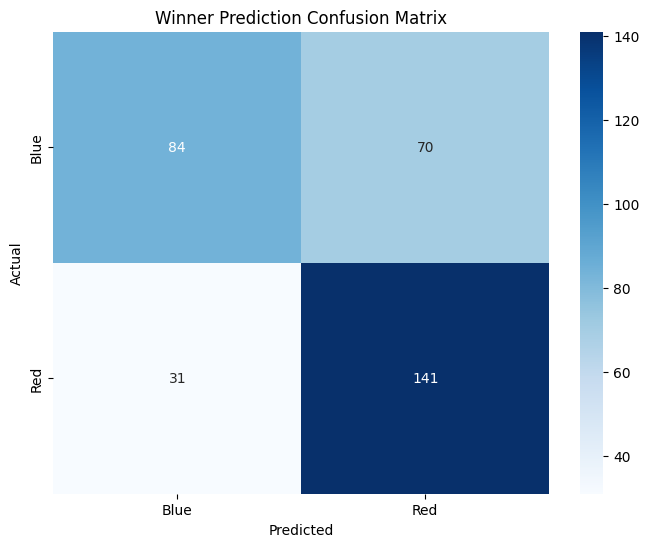

In [ ]:
"""
Purpose:
    - Calculate and display the accuracy of the winner prediction model.
    - Generate and display a detailed classification report for the winner model.
    - Visualize the confusion matrix of the winner model to assess where the model is making correct and incorrect predictions.

Variables:
    - accuracy_winner: Accuracy score of the winner model.
    - report: Dictionary containing precision, recall, f1-score, and support for each class.
    - classification_df: DataFrame version of the classification report.
    - cm_winner: Confusion matrix array.
    - Plotting functions to display the heatmap.

Similar steps are repeated for Method Model Evaluations and Round Model Evaluation, calculating accuracy, generating classification reports, and plotting confusion matrices.
"""

# Accuracy
accuracy_winner = accuracy_score(y_test_winner, y_pred_winner)
#print(f"Winner Model Accuracy: {accuracy_winner:.2f}")
display(HTML(f"<h3>Winner Model Accuracy: {accuracy_winner:.2f}</h3>"))

# Convert classification report to DataFrame
report = classification_report(y_test_winner, y_pred_winner, output_dict=True)
classification_df = pd.DataFrame(report).transpose()

# Display Classification Report as a Table
#print("Winner Model Classification Report:")
display(HTML("<h3>Winner Model Classification Report:</h3>"))
display(classification_df)

# Confusion Matrix as a Heatmap
# Blue = 0 and Red =1
cm_winner = confusion_matrix(y_test_winner, y_pred_winner)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_winner, annot=True, fmt='d', cmap='Blues', xticklabels=["Blue", "Red"], yticklabels=["Blue", "Red"])
plt.title("Winner Prediction Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###**7.2 Method Model Evaluations**

- **Accuracy:** The accuracy of the method prediction model is calculated.
- **Classification Report:** Detailed performance metrics for each method class.
- **Confusion Matrix:** Heatmap visualization to assess prediction errors between different methods.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,1.000000
1,0.988095,1.000000,0.994012,83.000000
2,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.000000,0.000000,47.000000
5,1.000000,1.000000,1.000000,55.000000
6,0.741935,0.992806,0.849231,139.000000
accuracy,0.846626,0.846626,0.846626,0.846626
macro avg,0.455005,0.498801,0.473874,326.000000
weighted avg,0.736629,0.846626,0.783884,326.000000


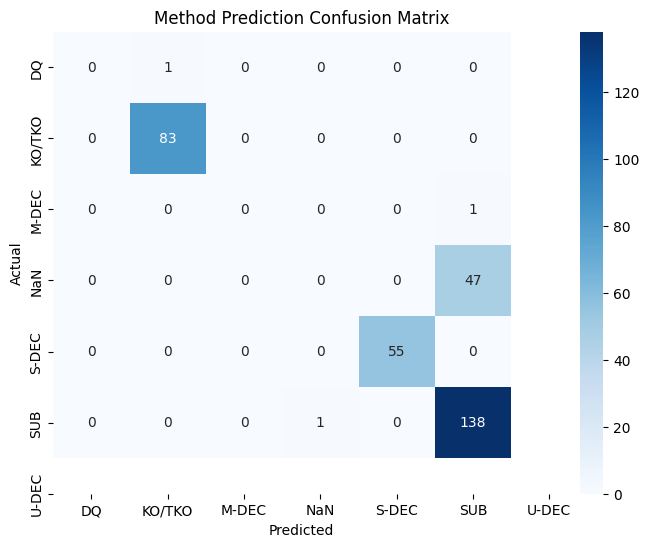

In [ ]:
# Accuracy
accuracy_method = accuracy_score(y_test_method, y_pred_method)
display(HTML(f"<h3>Method Model Accuracy: {accuracy_method:.2f}</h3>"))

# Convert classification report to DataFrame
report_method = classification_report(y_test_method, y_pred_method, output_dict=True)
classification_method_df = pd.DataFrame(report_method).transpose()

# Display Classification Report as a Table
display(HTML("<h3>Method Model Classification Report:</h3>"))
display(classification_method_df)

# Confusion Matrix as a Heatmap
cm_method = confusion_matrix(y_test_method, y_pred_method)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_method, annot=True, fmt='d', cmap='Blues',
            xticklabels=["DQ", "KO/TKO",  "M-DEC", "NaN", "S-DEC", "SUB", "U-DEC"],
            yticklabels=["DQ", "KO/TKO",  "M-DEC", "NaN", "S-DEC", "SUB", "U-DEC"])
plt.title("Method Prediction Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###**7.3 Round Model Evaluation**

- **Accuracy:** The accuracy of the round prediction model is calculated.
- **Classification Report:** Performance metrics for each round class.
- **Confusion Matrix:** Visualization to see how well the model predicts the correct round.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,66.000000
2,0.920000,1.000000,0.958333,46.000000
3,0.974093,0.979167,0.976623,192.000000
4,0.000000,0.000000,0.000000,3.000000
5,1.000000,0.894737,0.944444,19.000000
accuracy,0.972393,0.972393,0.972393,0.972393
macro avg,0.778819,0.774781,0.775880,326.000000
weighted avg,0.964251,0.972393,0.967912,326.000000


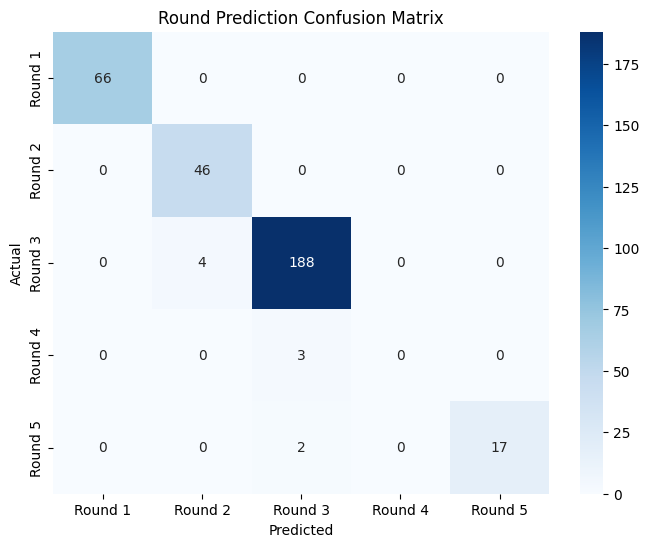

In [ ]:
# Accuracy
accuracy_round = accuracy_score(y_test_round, y_pred_round)
display(HTML(f"<h3>Round Model Accuracy: {accuracy_round:.2f}</h3>"))

# Convert classification report to DataFrame
report_round = classification_report(y_test_round, y_pred_round, output_dict=True)
classification_round_df = pd.DataFrame(report_round).transpose()

# Display Classification Report as a Table
display(HTML("<h3>Round Model Classification Report:</h3>"))
display(classification_round_df)

# Confusion Matrix as a Heatmap
cm_round = confusion_matrix(y_test_round, y_pred_round)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_round, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Round 1", "Round 2", "Round 3", "Round 4", "Round 5"],
            yticklabels=["Round 1", "Round 2", "Round 3", "Round 4", "Round 5"])
plt.title("Round Prediction Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##**Step 8: Save and load models**

###**8.1 Save Models**

- **Model Persistence:** Saves models to disk to avoid retraining.
- **pickle.dump():** Serializes the model object.

In [ ]:
"""
Purpose: Save the trained models to disk using pickle for future use without retraining.

Variables:
    - f: File object for writing binary data.
    - 'winner_model.pkl', 'method_model.pkl', 'round_model.pkl': Filenames for the saved models.
"""

# Save the winner prediction model
with open('winner_model.pkl', 'wb') as f:
    pickle.dump(winner_model, f)

# Save the method prediction model
with open('method_model.pkl', 'wb') as f:
    pickle.dump(method_model, f)

# Save the round prediction model
with open('round_model.pkl', 'wb') as f:
    pickle.dump(round_model, f)

print("All models have been saved successfully.")

###**8.2 Load Models**

- **Model Restoration:** Allows us to use the trained models without retraining.
- **pickle.load():** Deserializes the model object.

In [ ]:
"""
Purpose: Load the saved models from disk using pickle.

Variables:
    - f: File object for reading binary data.
    - winner_model, method_model, round_model: Loaded model instances ready for use.
"""

# Load the winner prediction model
with open('winner_model.pkl', 'rb') as f:
    winner_model = pickle.load(f)

# Load the method prediction model
with open('method_model.pkl', 'rb') as f:
    method_model = pickle.load(f)

# Load the round prediction model
with open('round_model.pkl', 'rb') as f:
    round_model = pickle.load(f)

print("All models have been loaded successfully.")